In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pylab import *

import numpy as np
import pyemma
import pytraj as pt
import mdtraj as md

import pickle
import seaborn as sns
from itertools import product
from pandas import DataFrame

from itertools import cycle
import pandas as pd
from os.path import join
from collections import OrderedDict

from pyemma.util.contexts import settings
from glob import glob

# SASA calculated using Amber `surf` command

## From crystal Structure

In [24]:
traj_open = pt.iterload('../1-Trajectories/0-Parm_rst/open10_dry.rst7', 
                        '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

sasa_open_all=[pt.surf(traj_open, ':46@CB'), 
               pt.surf(traj_open, ':78@CB'), 
               pt.surf(traj_open, ':110@CB'), 
               pt.surf(traj_open, ':142@CB'), 
               pt.surf(traj_open, ':174@CB'), 
               pt.surf(traj_open, ':14@CB')]

sasa_open_all

[array([3.37796071]),
 array([10.468972]),
 array([4.83080351]),
 array([10.39704819]),
 array([4.28204619]),
 array([2.95710921])]

In [25]:
traj_closed = pt.iterload('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
                          '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

sasa_closed_all=[pt.surf(traj_closed , ':46@CB'), 
                 pt.surf(traj_closed , ':78@CB'),
                 pt.surf(traj_closed , ':110@CB'),
                 pt.surf(traj_closed , ':142@CB'),
                 pt.surf(traj_closed , ':174@CB'),
                 pt.surf(traj_closed , ':14@CB')]

sasa_closed_all

[array([4.58195891]),
 array([7.76625221]),
 array([20.33505007]),
 array([4.41514841]),
 array([6.47253504]),
 array([5.51322351])]

## Without IPA

In [12]:
sasa_1=[]
sasa_2=[]
sasa_3=[]
sasa_4=[]
sasa_5=[]
sasa_6=[]

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref0.xtc"))

for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7", stride=1)
    sasa_6.append(pt.surf(traj, ':14@CB'))
    sasa_1.append(pt.surf(traj, ':46@CB'))
    sasa_2.append(pt.surf(traj, ':78@CB'))
    sasa_3.append(pt.surf(traj, ':110@CB'))
    sasa_4.append(pt.surf(traj, ':142@CB'))
    sasa_5.append(pt.surf(traj, ':174@CB'))


###

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref1.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7", stride=1)
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':14@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':46@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':78@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':110@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':142@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':174@CB'))
    count+=1

###

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref2.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7", stride=1)
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':14@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':46@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':78@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':110@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':142@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':174@CB'))
    count+=1

###

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref3.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7", stride=1)
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':14@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':46@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':78@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':110@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':142@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':174@CB'))
    count+=1


###

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref4.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7", stride=1)
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':14@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':46@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':78@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':110@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':142@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':174@CB'))
    count+=1


###

traj_list=sorted(glob("./sample_structures/2-Without_IPA/5-MSM_10000_samples_per_ref/pcca*_ref5.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7", stride=1)
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':14@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':46@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':78@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':110@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':142@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':174@CB'))
    count+=1

sasa_all=[sasa_1, sasa_2, sasa_3, sasa_4, sasa_5, sasa_6]

In [ ]:
print(len(sasa_1), len(sasa_1[0]), len(sasa_all))

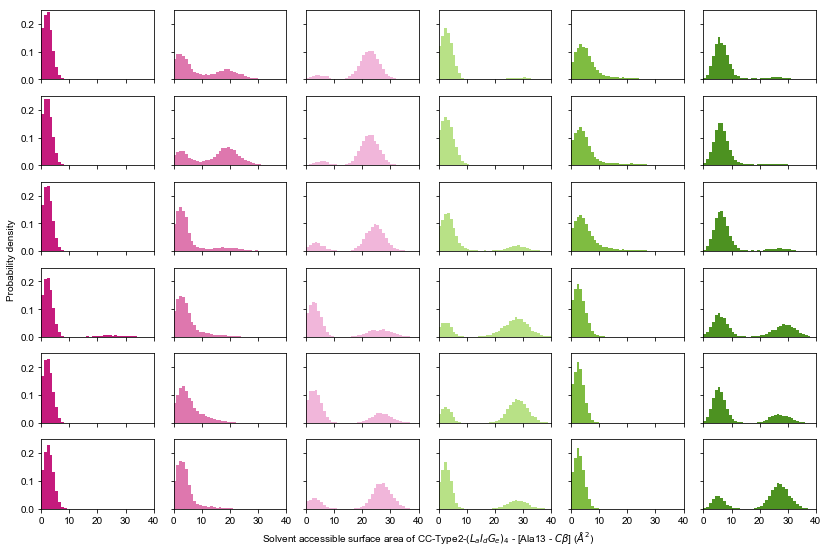

In [13]:
colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[1,1,1,1,1,1,
      0,0,0,0,0,0,
      2,2,2,2,2,2,
      3,3,3,3,3,3,
      5,5,5,5,5,5,
      4,4,4,4,4,4]

chains=[0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5]

fig, axes = plt.subplots(6, 6, figsize=(12, 8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_all[chains[i]][pcca[i]], 
            bins=40, 
            density=True,
            range=(0.0,40),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})



    ax.set_xlim(0.0,40)
    ax.set_xticks(np.arange(0, 50, 10))    
    ax.set_ylim(0,0.25)
    ax.set_yticks(np.arange(0, 0.25, 0.1))     


# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of CC-Type2-($L_aI_dG_e)_4$ - [Ala13 - $C\beta$] ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()
fig.savefig('./plots/2-Without_IPA/32_SASA_Ala13_CB_amber.png', dpi=600)

In [21]:
weights=[0.018,0.074,0.040,0.053,0.196,0.620]

exposed=[]
tot=[]
for j in range(0,6):
    a=[]
    for i in range(0,6):
        a.append(np.size(np.where(sasa_all[i][j]>=10)))
    exposed.append(a)



array([18292, 16380, 14743, 16923, 18164, 14763])

In [22]:
np.array(exposed)

array([[   5, 6465, 9042,  197, 1146, 1437],
       [  11, 3826, 8856,  659, 1325, 1703],
       [  74, 1622, 7964, 1965, 1306, 1812],
       [ 732, 1110, 2818, 7193,  186, 4884],
       [  26,  583, 7570, 2442,   45, 7498],
       [  60, 1485, 2907, 7167,   40, 3104]])

In [25]:
np.array([   5, 6465, 9042,  197, 1146, 1437]).sum()

1.001

In [24]:
np.array(exposed).sum(axis=1)

array([18292, 16380, 14743, 16923, 18164, 14763])

In [32]:
np.multiply(np.array(exposed).sum(axis=1), np.array(weights)).sum()/60000

0.26235365

## With IPA

In [2]:
sasa_1=[]
sasa_2=[]
sasa_3=[]
sasa_4=[]
sasa_5=[]
sasa_6=[]

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref0.xtc"))

for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7", stride=1)
    sasa_6.append(pt.surf(traj, ':14@CB'))
    sasa_1.append(pt.surf(traj, ':46@CB'))
    sasa_2.append(pt.surf(traj, ':78@CB'))
    sasa_3.append(pt.surf(traj, ':110@CB'))
    sasa_4.append(pt.surf(traj, ':142@CB'))
    sasa_5.append(pt.surf(traj, ':174@CB'))


###

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref1.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7", stride=1)
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':14@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':46@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':78@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':110@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':142@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':174@CB'))
    count+=1

###

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref2.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7", stride=1)
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':14@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':46@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':78@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':110@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':142@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':174@CB'))
    count+=1

###

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref3.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7", stride=1)
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':14@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':46@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':78@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':110@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':142@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':174@CB'))
    count+=1


###

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref4.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7", stride=1)
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':14@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':46@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':78@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':110@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':142@CB'))
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':174@CB'))
    count+=1


###

traj_list=sorted(glob("./sample_structures/1-With_IPA/5-MSM_10000_samples_per_ref/pcca*_ref5.xtc"))
count=0
for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7", stride=1)
    sasa_1[count]=np.append(sasa_1[count], pt.surf(traj, ':14@CB'))
    sasa_2[count]=np.append(sasa_2[count], pt.surf(traj, ':46@CB'))
    sasa_3[count]=np.append(sasa_3[count], pt.surf(traj, ':78@CB'))
    sasa_4[count]=np.append(sasa_4[count], pt.surf(traj, ':110@CB'))
    sasa_5[count]=np.append(sasa_5[count], pt.surf(traj, ':142@CB'))
    sasa_6[count]=np.append(sasa_6[count], pt.surf(traj, ':174@CB'))
    count+=1

sasa_ipa_all=[sasa_1, sasa_2, sasa_3, sasa_4, sasa_5, sasa_6]

In [3]:
print(len(sasa_1), len(sasa_1[0]), len(sasa_ipa_all))

5 10000 6


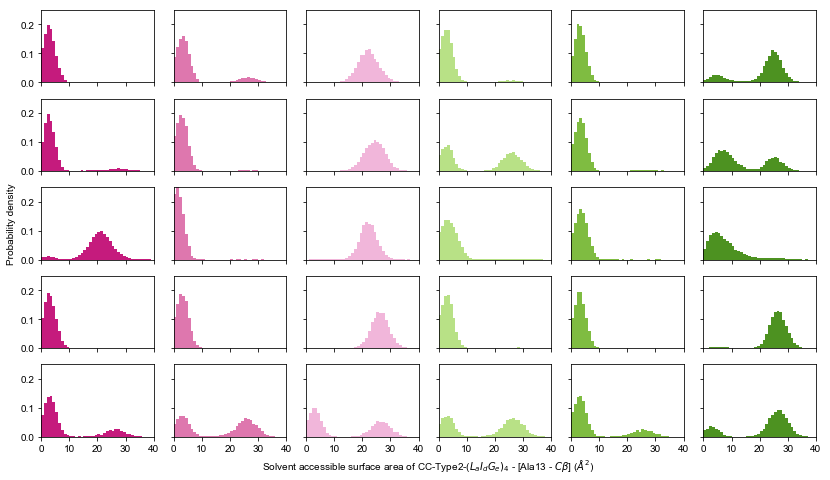

In [4]:
colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[2,2,2,2,2,2,
      1,1,1,1,1,1,
      3,3,3,3,3,3,
      4,4,4,4,4,4,
      0,0,0,0,0,0]

chains=[0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5]

fig, axes = plt.subplots(5, 6, figsize=(12, 7), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_ipa_all[chains[i]][pcca[i]], 
            bins=40, 
            density=True,
            range=(0.0,40),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})


    ax.set_xlim(0.0,40)
    ax.set_xticks(np.arange(0, 50, 10))    
    ax.set_ylim(0,0.25)
    ax.set_yticks(np.arange(0, 0.25, 0.1))   

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of CC-Type2-($L_aI_dG_e)_4$ - [Ala13 - $C\beta$] ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()
fig.savefig('./plots/1-With_IPA/32_SASA_Ala13_CB_amber.png', dpi=600)

In [5]:
weights=[0.029693,0.099180,0.194989,0.162358,0.513779]

exposed=[]
tot=[]
for j in range(0,5):
    a=[]
    for i in range(0,6):
        a.append(np.size(np.where(sasa_ipa_all[i][j]>=10)))
    exposed.append(a)


In [6]:
np.array(exposed).sum(axis=1)

array([27690, 21462, 20282, 22389, 20190])

In [8]:
np.multiply(np.array(exposed).sum(axis=1), np.array(weights)).sum()/60000

0.3485633083333333

## CCHex2

In [33]:
traj_list=sorted(glob("../1-Trajectories/5-CC-Hex2/ccHex2_*_prod_dry.nc"))
traj = pt.iterload(traj_list, "../1-Trajectories/5-CC-Hex2/ccHex2_dry.parm7", stride=10)

sasa_6=[pt.surf(traj, ':19@CB')]
sasa_1=[pt.surf(traj, ':51@CB')]
sasa_2=[pt.surf(traj, ':83@CB')]
sasa_3=[pt.surf(traj, ':115@CB')]
sasa_4=[pt.surf(traj, ':147@CB')]
sasa_5=[pt.surf(traj, ':179@CB')]
        
sasa_cchex2_all=[sasa_1, sasa_2, sasa_3, sasa_4, sasa_5, sasa_6]

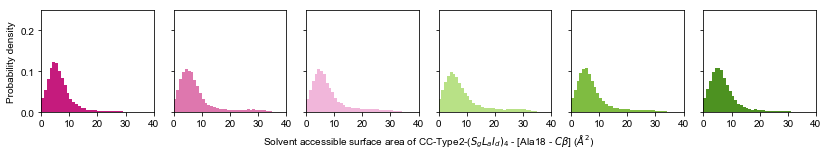

In [41]:
colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']

fig, axes = plt.subplots(1, 6, figsize=(12, 2.5), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_cchex2_all[i], 
            bins=40, 
            density=True,
            range=(0.0,40),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})


    ax.set_xlim(0.0,40)
    ax.set_xticks(np.arange(0, 50, 10))    
    ax.set_ylim(0,0.25)
    ax.set_yticks(np.arange(0, 0.25, 0.1))   

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of CC-Type2-($S_gL_aI_d)_4$ - [Ala18 - $C\beta$] ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()
fig.savefig('./plots/4-ccHex2/32_SASA_Ala13_CB_amber.png', dpi=600)

## Test including IPA molecules

In [97]:
traj = pt.load("../1-Trajectories/6-States_with_IPA/adapt1_ipa_dry_20_aligned.nc", 
                   "../1-Trajectories/6-States_with_IPA/adapt1_ipa_dry_20.parm7", stride=1)
traj

pytraj.Trajectory, 5000 frames: 
Size: 1.687109 (GB)
<Topology: 15096 atoms, 1216 residues, 1030 mols, PBC with box type = truncoct>
           

In [92]:
traj=pt.strip(traj, ":IPA")
traj

pytraj.Trajectory, 5000 frames: 
Size: 0.313818 (GB)
<Topology: 2808 atoms, 192 residues, 6 mols, PBC with box type = truncoct>
           

In [98]:
sasa_test=[pt.surf(traj, ':46@CB'), 
               pt.surf(traj, ':78@CB'), 
               pt.surf(traj, ':110@CB'), 
               pt.surf(traj, ':142@CB'), 
               pt.surf(traj, ':174@CB'), 
               pt.surf(traj, ':14@CB')]

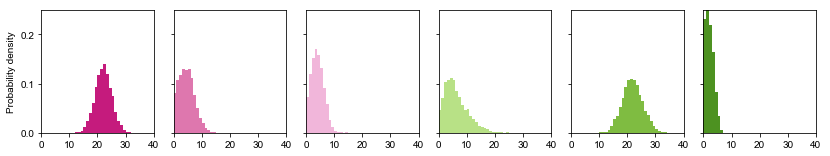

In [94]:
colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']

fig, axes = plt.subplots(1, 6, figsize=(12, 2.5), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_test[i], 
            bins=40, 
            density=True,
            range=(0.0,40),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})


    ax.set_xlim(0.0,40)
    ax.set_xticks(np.arange(0, 50, 10))    
    ax.set_ylim(0,0.25)
    ax.set_yticks(np.arange(0, 0.25, 0.1))   

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
# plt.xlabel(r'Solvent accessible surface area of CC-Type2-($S_gL_aI_d)_4$ - [Ala18 - $C\beta$] ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()

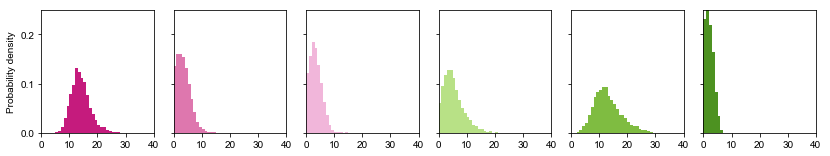

In [99]:
colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']

fig, axes = plt.subplots(1, 6, figsize=(12, 2.5), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_test[i], 
            bins=40, 
            density=True,
            range=(0.0,40),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})


    ax.set_xlim(0.0,40)
    ax.set_xticks(np.arange(0, 50, 10))    
    ax.set_ylim(0,0.25)
    ax.set_yticks(np.arange(0, 0.25, 0.1))   

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
# plt.xlabel(r'Solvent accessible surface area of CC-Type2-($S_gL_aI_d)_4$ - [Ala18 - $C\beta$] ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()

In [83]:
sasa_1=[]
sasa_2=[]
sasa_3=[]
sasa_4=[]
sasa_5=[]
sasa_6=[]

traj_list=sorted(glob("./sample_structures/1-With_IPA/3-MSM_10000_samples/pcca*.xtc"))

for t in traj_list:
    traj = pt.iterload(t, "../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7", stride=10)
    sasa_6.append(pt.surf(traj, ':14@CB'))
    sasa_1.append(pt.surf(traj, ':46@CB'))
    sasa_2.append(pt.surf(traj, ':78@CB'))
    sasa_3.append(pt.surf(traj, ':110@CB'))
    sasa_4.append(pt.surf(traj, ':142@CB'))
    sasa_5.append(pt.surf(traj, ':174@CB'))

In [84]:
sasa_test=[sasa_1, sasa_2, sasa_3, sasa_4, sasa_5, sasa_6]

In [85]:
sasa_1

[array([25.97745848, 21.76620545, 23.60954632, ..., 29.84951021,
        24.4256855 , 24.35909417]),
 array([ 2.78067584, 31.34013034,  4.29896951, ...,  1.05959123,
         2.60121619,  5.62172576]),
 array([ 3.34666144, -1.23955456,  4.27554192, ...,  3.11149062,
         3.74573304,  1.21149679]),
 array([ 3.48421023, 20.39927786,  6.23406183, ..., 25.76494259,
         5.64036281,  1.63325879]),
 array([ 5.40041376,  4.27469385, -3.47154522, ...,  2.16282534,
         6.27661829,  2.43068333])]

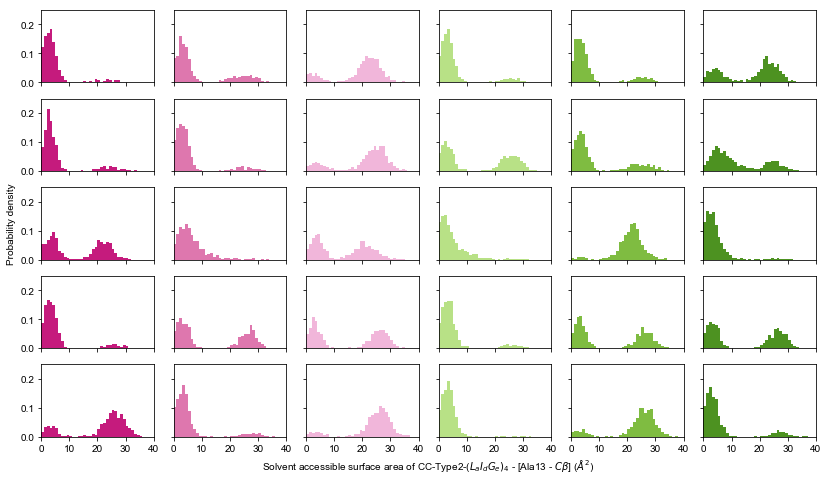

In [86]:
colours=['#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221',
         '#c51b7d','#de77ae','#f1b6da','#b8e186','#7fbc41','#4d9221']


# mapped as PCCA 0,1,2,3,4,5 correspond to S2, S1, S3, S4, S6, S5 resp.
# Note that chain B is 0 or very small. If 0 creates a large hist, 
# so used the very small value for entries that are 0
pcca=[2,2,2,2,2,2,
      1,1,1,1,1,1,
      3,3,3,3,3,3,
      4,4,4,4,4,4,
      0,0,0,0,0,0]

chains=[0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5,
        0,1,2,3,4,5]

fig, axes = plt.subplots(5, 6, figsize=(12, 7), sharex=True, sharey=True)

for i, ax in enumerate(axes.flat):
    ax.hist(sasa_test[chains[i]][pcca[i]], 
            bins=40, 
            density=True,
            range=(0.0,40),
            color=colours[i])
#     sns.distplot(sasa_all_at_2[pcca[i]][:,at[i]], kde=False, ax=ax, bins=10,norm_hist=False, 
#                  color=colours[i], hist_kws={"alpha": 1})


    ax.set_xlim(0.0,40)
    ax.set_xticks(np.arange(0, 50, 10))    
    ax.set_ylim(0,0.25)
    ax.set_yticks(np.arange(0, 0.25, 0.1))   

# To have common x and y labels
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)    
plt.xlabel(r'Solvent accessible surface area of CC-Type2-($L_aI_dG_e)_4$ - [Ala13 - $C\beta$] ($\AA^2$)')
plt.ylabel(r'Probability density')

fig.tight_layout()